In [131]:
import seaborn as sns
import scipy as scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection

%matplotlib inline 

In [132]:
print(df.shape)
print(df.columns)
print(df.dtypes)
df.describe(include="all")

(150, 5)
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [148]:
df = sns.load_dataset("iris")
df=pd.DataFrame(df)
df.species.unique() #don't predict setosa, or rather its easier to predict setosa

array(['setosa', 'versicolor', 'virginica'], dtype=object)

1. try to get the plotting of the points as clusters (like which is species, and the other details)
2. try to predict the sepal length & sepal width based on the speices, petal_length & petal_width
3. Classifying the different flowers based on petal width & petal length[matrix] because the sepal width & sepal length doesn't have a linear relationship, harder to do. 
4. remove the column for species then do a learning, classification model

KNN. linear regression has many variables?
Use housing as a template to get the main frame out.

In [204]:
df['setosa']=np.where(df['species']=='setosa',1,0)
df['versicolor']=np.where(df['species']=='versicolor',2,0)
df['virginica']=np.where(df['species']=='virginica',3,0)
print(df['species'].sum(), df['species'].sum(), df['virginica'].sum())
df.head()

50 100 150


,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
148,6.2,3.4,5.4,2.3,virginica,0,0,3
80,5.5,2.4,3.8,1.1,versicolor,0,2,0
97,6.2,2.9,4.3,1.3,versicolor,0,2,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0
35,5.0,3.2,1.2,0.2,setosa,1,0,0


C:\Users\LH772HBK\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\LH772HBK\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


NameError: name 'red' is not defined

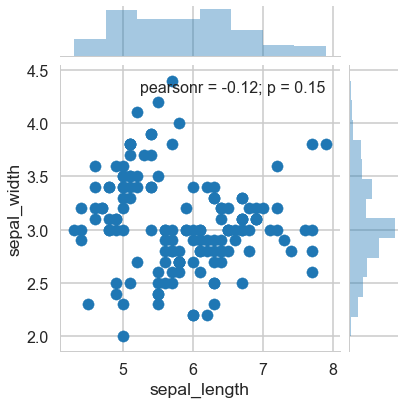

In [179]:
sns.jointplot(x=df['sepal_length'], y=df['sepal_width'], data=df) #==> non-normal
sns.jointplot(x=df['petal_length'], y=df['petal_width'], data=df, color=red , ) #==> linear 

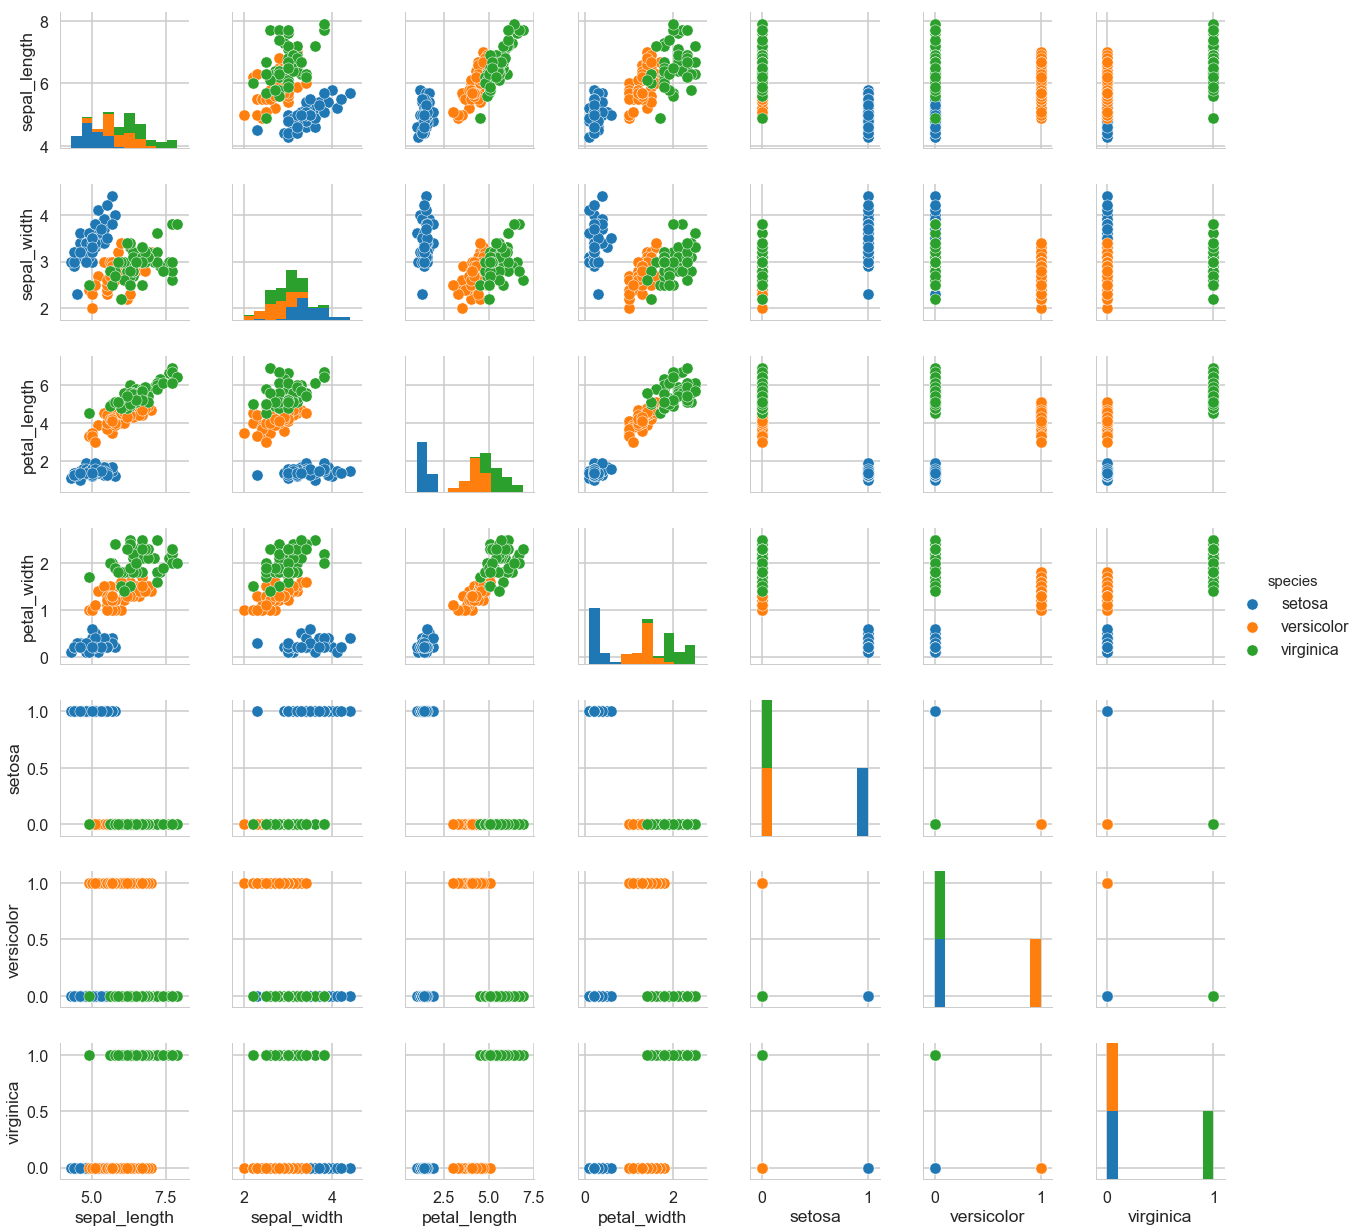

In [151]:
sns.pairplot(df, hue="species") #==> Best Relationship is Sepal Length & Petal Width

In [296]:
#1st see which model is good ==> KNN, SVM, LR
from sklearn.model_selection import train_test_split as train_test_split
from sklearn.svm import NuSVC
df = shuffle(df)

df_feat = pd.DataFrame(df, columns=df.columns[:-4])
X = df_feat
y = df.species

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=800)


In [301]:
model = SVC()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

pred=model.predict(X_test)
pred

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[17  0  0]
 [ 0 15  1]
 [ 0  1 11]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        17
 versicolor       0.94      0.94      0.94        16
  virginica       0.92      0.92      0.92        12

avg / total       0.96      0.96      0.96        45



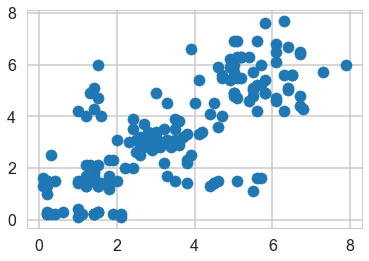

In [302]:
np.random.seed(19680801)

x = X_train[0:45]
y = X_test

plt.scatter(x, y)
plt.show()

In [250]:
LR=LogisticRegression()
LR.fit(X_train, y_train)

predictions = LR.predict(X_test)

pred1=LR.predict(X_test)
pred1

print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))


[[16  0  0]
 [ 0 12  4]
 [ 0  0 13]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        16
 versicolor       1.00      0.75      0.86        16
  virginica       0.76      1.00      0.87        13

avg / total       0.93      0.91      0.91        45



In [256]:
#Import Library
from sklearn.naive_bayes import GaussianNB

NB=GaussianNB()
NB.fit(X_train, y_train)
#Predict Output
predicted= NB.predict(X_test)
predicted

print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))
#https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/

[[16  0  0]
 [ 0 15  1]
 [ 0  1 12]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        16
 versicolor       0.94      0.94      0.94        16
  virginica       0.92      0.92      0.92        13

avg / total       0.96      0.96      0.96        45



In [263]:
#Import Library
from sklearn.neighbors import KNeighborsClassifier
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create KNeighbors classifier object model 

KNN=KNeighborsClassifier()
KNeighborsClassifier(n_neighbors=6) # default value for n_neighbors is 5
# Train the model using the training sets and check score
model.fit(X_train, y_train)
#Predict Output
predictKNN= model.predict(X_test)
predictKNN

print(confusion_matrix(y_test,predictKNN))
print(classification_report(y_test,predictKNN))
#https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/

[[16  0  0]
 [ 0 15  1]
 [ 0  0 13]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        16
 versicolor       1.00      0.94      0.97        16
  virginica       0.93      1.00      0.96        13

avg / total       0.98      0.98      0.98        45



In [266]:
#Import Library
from sklearn.cluster import KMeans
#Assumed you have, X (attributes) for training data set and x_test(attributes) of test_dataset
# Create KNeighbors classifier object model 
k_means = KMeans(n_clusters=4, random_state=110)


# Train the model using the training sets and check score
model.fit(X_train,y_train)
#Predict Output
predictedKmeans= model.predict(X_test)
predictedKmeans

print(confusion_matrix(y_test,predictedKmeans))
print(classification_report(y_test,predictedKmeans))
#https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/

[[16  0  0]
 [ 0 15  1]
 [ 0  0 13]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        16
 versicolor       1.00      0.94      0.97        16
  virginica       0.93      1.00      0.96        13

avg / total       0.98      0.98      0.98        45

